<a href="https://colab.research.google.com/github/auliaaaz/-NLP-Natural-Language-Processing/blob/main/Analysis_Sentiments_Simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import numpy as np
import pandas as pd
import re
import requests
import nltk
nltk.download('stopwords')
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwprd')
nltk.download('wordnet')
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading stopwprd: Package 'stopwprd' not found in
[nltk_data]     index
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
!pip3 install Sastrawi

In [3]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

import dataset

https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv')
t_1 = data[data['Sentiment']=='positive']
t_2 = data[data['Sentiment']=='negative']
tweets = pd.concat([t_1, t_2])


In [5]:
# cek 5 dataset
tweets.head()

,Id,Sentiment,Text Tweet
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE..."
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa..."
16,17,positive,<PROVIDER_NAME> <PROVIDER_NAME> kangen nih dap...
22,23,positive,Jadi stabil disini. <PROVIDER_NAME> <URL>


In [6]:
# cek 5 dataset terbawah
tweets.tail()

,Id,Sentiment,Text Tweet
283,284,negative,Setiap isi pulsa belum dipakai pasti hilang mo...
284,285,negative,<PROVIDER_NAME> memang bikin sebal
285,286,negative,4G LTE <PROVIDER_NAME> sedang bermasalah
286,287,negative,<PROVIDER_NAME> luar biasa parah 2 hari cuma b...
299,300,negative,Sinyal <PROVIDER_NAME> amsyong d stadion gajayana


In [10]:
tweets = tweets.rename(columns={'Id':'Id', 'Sentiment':'Sentiment', 'Text Tweet':'text'})

In [11]:
# cek atribut dataset
display(tweets.columns)

# cek jumlah baris dan kolom dataset
display(tweets.shape)

Index(['Id', 'Sentiment', 'text'], dtype='object')

(300, 3)

explorasi data

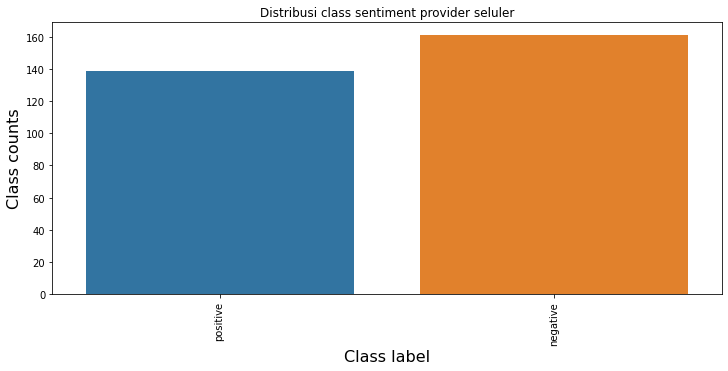

In [12]:
# cek jumlah positif negatif
plt.figure(figsize=(12,5))
sns.countplot(x='Sentiment', data=tweets)
plt.title('Distribusi class sentiment provider seluler')
plt.ylabel('Class counts', fontsize=16)
plt.xlabel('Class label', fontsize=16)
plt.xticks(rotation='vertical');

Pemrosesan data

In [13]:
#simpan kata-kata stopword

# f=open('stopwordlist.txt')

url = "https://raw.githubusercontent.com/rizalespe/Dataset-Sentimen-Analisis-Bahasa-Indonesia/master/dataset_tweet_sentiment_cellular_service_provider.csv"
ina_stopword = requests.get(url).content

tempStoplist = []
for tempstp in ina_stopword.split():
  tempStoplist.append(tempstp)

In [16]:
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" #regex untuk remove punctuation

def preprocessing(tweet):
  tweet = re.sub(TEXT_CLEANING_RE,'', str(tweet).lower()).strip() #casefolding dan remove punctuation
  processed_tweets = []

  for token in tweet.split():
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      processed_tweets.append(token) 
  return " ".join(processed_tweets)



In [19]:
# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia
%%time

tweets['clean_twt'] = tweets.text.apply(lambda x: preprocessing(x))
tweets['clean_twt'] = tweets.clean_twt.str.replace('rt', '')

CPU times: user 260 ms, sys: 479 µs, total: 261 ms
Wall time: 270 ms


In [20]:
tweets.head()

,Id,Sentiment,text,clean_twt
0,1,positive,<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan...,<user_mention> #boikot_<provider_name> gunakan...
1,2,positive,"Saktinya balik lagi, alhamdulillah :v <PROVIDE...","saktinya balik lagi, alhamdulillah :v <provide..."
6,7,positive,"<PROVIDER_NAME> aku pakai <PROVIDER_NAME>, pa...","<provider_name> aku pakai <provider_name>, pak..."
16,17,positive,<PROVIDER_NAME> <PROVIDER_NAME> kangen nih dap...,<provider_name> <provider_name> kangen nih dap...
22,23,positive,Jadi stabil disini. <PROVIDER_NAME> <URL>,jadi stabil disini. <provider_name> <url>


In [21]:
from sklearn.preprocessing import LabelEncoder

X = tweets.iloc[:, 2]
le = LabelEncoder()
le.fit(["positive", "negative"])

print(list(le.classes_))
y = le.transform(tweets.iloc[:, 1])

print(X.shape)
print(X[0]) #print kolom x baris pertama/index 0
print(y.shape)
print(y[0])

['negative', 'positive']
(300,)
<USER_MENTION> #BOIKOT_<PROVIDER_NAME> Gunakan Produk Bangsa Sendiri <PROVIDER_NAME>
(300,)
1


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(min_df=5, ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(tweets.clean_twt).toarray()

In [26]:
X1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.27427722,
        0.24740633],
       ...,
       [0.        , 0.33264528, 0.54619923, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

handling imbalanced data

In [27]:
from collections import Counter

counter = Counter(y)
print(counter)

Counter({0: 161, 1: 139})


In [28]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X1, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [29]:
from collections import Counter
counter = Counter(Y_smote)
print(counter)

Counter({1: 161, 0: 161})


In [30]:
# Membagi data training dan test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.2, random_state=0)

melatih dan evaluasi model klasifikasi teks

In [31]:
import time

from sklearn.ensemble import RandomForestClassifier

text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [32]:
from sklearn.naive_bayes import GaussianNB
text_classifier_nb = GaussianNB()
t0_nb = time.time()
text_classifier_nb.fit(X_train, y_train)
t1_nb = time.time()

In [33]:
from sklearn.svm import SVC
text_classifier_svm = SVC(kernel='linear')
t0_svm = time.time()
text_classifier_svm.fit(X_train, y_train)
t1_svm = time.time()

In [34]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

predictions_nb = text_classifier_nb.predict(X_test)
t2_nb = time.time()
time_linear_train_nb = t1_nb-t0_nb
time_linear_predict_nb = t2_nb-t1_nb

predictions_svm = text_classifier_svm.predict(X_test)
t2_svm = time.time()
time_linear_train_svm = t1_svm-t0_svm
time_linear_predict_svm = t2_svm-t1_svm

# results
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))
print("NB Training time: %fs; Prediction time: %fs" % (time_linear_train_nb, time_linear_predict_nb))
print("SVM Training time: %fs; Prediction time: %fs" % (time_linear_train_svm, time_linear_predict_svm))

EN Training time: 0.171072s; Prediction time: 5.358062s
NB Training time: 0.003606s; Prediction time: 3.401100s
SVM Training time: 0.020402s; Prediction time: 1.697901s


results


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")
print("Naive Bayes")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_nb)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_nb)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_nb)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_nb)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_nb))
print("")
print("Support Vector Machine")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_svm)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_svm)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_svm)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_svm)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_svm))
print("")


Random Forest
Accuracy  =  80.0 %
Recall    =  81.82 %
Precision =  79.41 %
F1-Score  =  80.6 %
ROC AUC   =  0.7997159090909092

Naive Bayes
Accuracy  =  86.15 %
Recall    =  96.97 %
Precision =  80.0 %
F1-Score  =  87.67 %
ROC AUC   =  0.8598484848484849

Support Vector Machine
Accuracy  =  81.54 %
Recall    =  78.79 %
Precision =  83.87 %
F1-Score  =  81.25 %
ROC AUC   =  0.8158143939393939



prediksi 


In [42]:
# Random Forest
# Input text
review = "jaringannya bagus"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['positive']


In [43]:
# Random Forest
# Input text
review = "sinyalnya lemot"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['negative']


In [44]:
# Naive Bayes
# Input text
review = "jaringannya bagus"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_nb.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['positive']


In [45]:
# Naive Bayes
# Input text
review = "sinyalnya lemot"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_nb.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['negative']


In [46]:
# SVM
# Input text
review = "jaringannya bagus"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_svm.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['positive']


In [47]:
# SVM
# Input text
review = "sinyalnya lemot"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_svm.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['negative']


prediksi dengan logistic regresi

In [48]:
#melakukan pemodelan prediksi
%%time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss, accuracy_score, recall_score, precision_score



CPU times: user 30 µs, sys: 5 µs, total: 35 µs
Wall time: 40.5 µs


In [62]:
#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(tweets.clean_twt)

In [63]:
vectorizer.vocabulary_

{'4g': 0,
 '4g provider_name': 1,
 'ada': 2,
 'aja': 3,
 'alhamdulillah': 4,
 'banget': 5,
 'banyak': 6,
 'bikin': 7,
 'bisa': 8,
 'boikot': 9,
 'boikot provider_name': 10,
 'buat': 11,
 'cuma': 12,
 'dan': 13,
 'dapat': 14,
 'dari': 15,
 'dari provider_name': 16,
 'data': 17,
 'dengan': 18,
 'di': 19,
 'gak': 20,
 'gratis': 21,
 'hari': 22,
 'ini': 23,
 'internet': 24,
 'jadi': 25,
 'jaringan': 26,
 'juga': 27,
 'karena': 28,
 'kau': 29,
 'ke': 30,
 'kenapa': 31,
 'kok': 32,
 'kuota': 33,
 'lagi': 34,
 'lancar': 35,
 'lebih': 36,
 'lemot': 37,
 'mahal': 38,
 'makin': 39,
 'masih': 40,
 'memang': 41,
 'pakai': 42,
 'pakai provider_name': 43,
 'paket': 44,
 'product_name': 45,
 'provider_name': 46,
 'provider_name provider_name': 47,
 'provider_name url': 48,
 'pulsa': 49,
 'saja': 50,
 'sama': 51,
 'sangat': 52,
 'saya': 53,
 'sinyal': 54,
 'sudah': 55,
 'tapi': 56,
 'tidak': 57,
 'url': 58,
 'user_mention': 59,
 'ya': 60,
 'yang': 61,
 'youtube': 62}

In [64]:
#modeling sentiment
LR_ = LogisticRegression().fit(X_train, y_train)

In [72]:
#melakukan evaluasi
yhat = LR_.predict(X_test)
yhat_prob = LR_.predict_proba(X_test)
# print('F1 score : ', f1_score(y_test, yhat, average='weighted'))
print('Accuracy  = ', round(accuracy_score(y_test,yhat)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, yhat)*100,2),'%')
print('Precision = ', round(precision_score(y_test, yhat)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, yhat)*100,2),'%')

print('Log Loss : ', round(log_loss(y_test, yhat_prob), 2))

Accuracy  =  84.62 %
Recall    =  84.85 %
Precision =  84.85 %
F1-Score  =  84.85 %
Log Loss :  0.5


Kesimpulan:

Metode Analysis pada data yang digunakan yang menunjukkan akurasi tertinggi adalah metode Naive Bayes.